In [ ]:
Testing with sample test data (self defined)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/manisha/miniconda3/envs/myenv/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/41d986d19ef24c93a4a3c4905ef8dafb-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/41d986d19ef24c93a4a3c4905ef8dafb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 21 COLUMNS
At line 46 RHS
At line 63 BOUNDS
At line 70 ENDATA
Problem MODEL has 16 rows, 6 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 1 - largest nonzero change 1.7802805e-05 ( 0.0017802805%) - largest zero change 0
0  Obj 0 Primal inf 590 (4)
4  Obj 590.00854 Primal inf 100 (4)
Primal infeasible - objective value 590.00854
PrimalInfeasible objective 590.0085376 - 4 ite

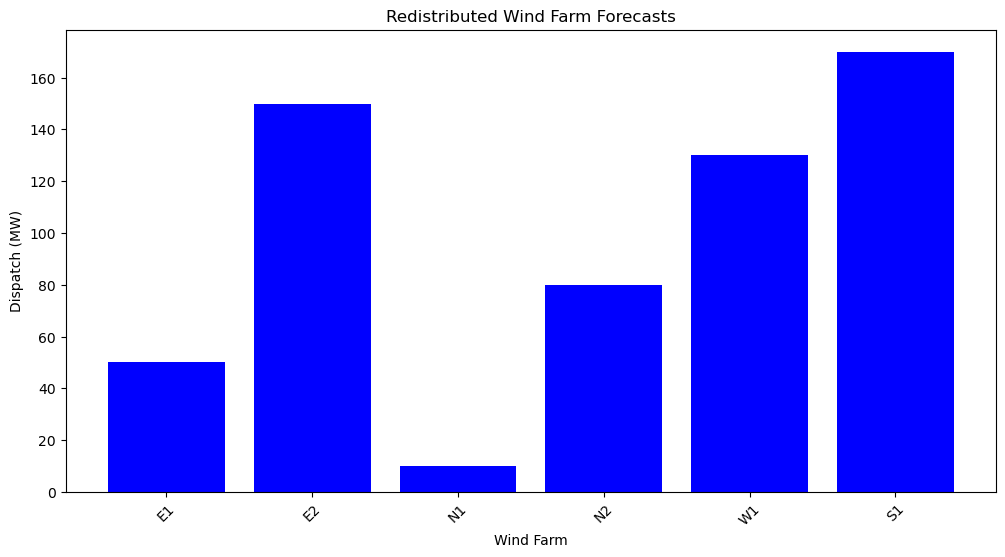

In [1]:
import pulp
import matplotlib.pyplot as plt

# Sample data
wind_farm_capacity = {
    'E1': 100,
    'E2': 150,
    'N1': 120,
    'N2': 80,
    'W1': 100,
    'S1': 150,
}
individual_forecasts = {
    'E1': 50,
    'E2': 60,
    'N1': 40,
    'N2': 50,
    'W1': 70,
    'S1': 80,
}

# Define zone forecasts and state forecast
zone_forecasts = {
    'East': 200,
    'North': 90,
    'West': 130,
    'South': 170,
}
state_forecast = 590

# Create the linear programming problem
prob = pulp.LpProblem("WindFarmDispatch", pulp.LpMinimize)

# Variables: Dispatch for each wind farm
dispatch_vars = {farm: pulp.LpVariable(farm, lowBound=0, upBound=wind_farm_capacity[farm]) for farm in wind_farm_capacity}

# Objective function: Minimize the absolute difference from the state forecast
prob += pulp.lpSum(dispatch_vars[farm] - individual_forecasts[farm] for farm in wind_farm_capacity)

# Constraints
for zone, forecast in zone_forecasts.items():
    prob += pulp.lpSum(dispatch_vars[farm] for farm in wind_farm_capacity if farm[0] == zone[0]) == forecast

for farm in wind_farm_capacity:
    prob += dispatch_vars[farm] <= wind_farm_capacity[farm]
    prob += dispatch_vars[farm] <= (individual_forecasts[farm] / wind_farm_capacity[farm]) * state_forecast

# Solve the problem
prob.solve()

# Print the results
for farm in wind_farm_capacity:
    print(f"{farm}: {dispatch_vars[farm].varValue} MW")

total_dispatch = sum(dispatch_vars[farm].varValue for farm in wind_farm_capacity)
print(f"Total Dispatch: {total_dispatch} MW")

# Create a bar chart to visualize the redistributed forecasts
farm_names = list(dispatch_vars.keys())
dispatch_values = [dispatch_vars[farm].varValue for farm in farm_names]

plt.figure(figsize=(12, 6))
plt.bar(farm_names, dispatch_values, color='blue')
plt.xlabel('Wind Farm')
plt.ylabel('Dispatch (MW)')
plt.title('Redistributed Wind Farm Forecasts')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Program for the given case with the input file (biourja-efzrr-y7i38ed9-input.csv) provided

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/manisha/miniconda3/envs/myenv/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/1b3b50e777044220aa9aae47e4717e06-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/1b3b50e777044220aa9aae47e4717e06-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 209 COLUMNS
At line 610 RHS
At line 815 BOUNDS
At line 916 ENDATA
Problem MODEL has 204 rows, 100 columns and 300 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-204) rows, 0 (-100) columns and 0 (-300) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 12800
After Postsolve, objective 12800, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 12800 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclo

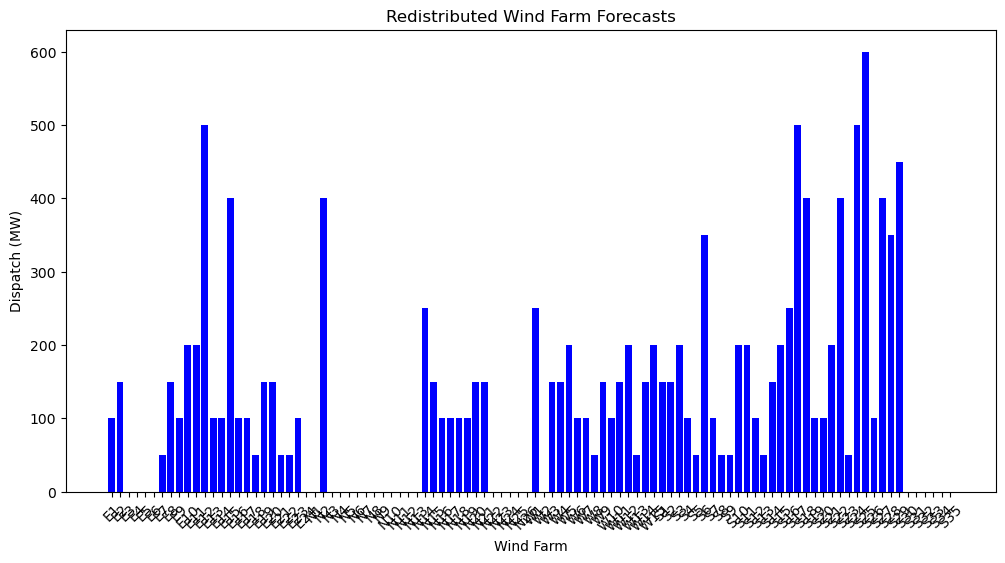

In [3]:
import pulp
import pandas as pd
import matplotlib.pyplot as plt

# Read input data from the CSV file
data = pd.read_csv('biourja-efzrr-y7i38ed9-input.csv')

# Extract data into dictionaries
wind_farm_capacity = dict(zip(data['Plant_Name'], data['Capacity']))  # Create a dictionary of wind farm capacities
individual_forecasts = dict(zip(data['Plant_Name'], data['Forecast']))  # Create a dictionary of individual wind farm forecasts

# Define zone forecasts and state forecast
zone_forecasts = {
    'East': 2800,
    'North': 1500,
    'West': 2000,
    'South': 6500,
}
state_forecast = 12000  # Set the total state-level forecast

# Create the linear programming problem
prob = pulp.LpProblem("WindFarmDispatch", pulp.LpMinimize)

# Variables: Dispatch for each wind farm
dispatch_vars = {farm: pulp.LpVariable(farm, lowBound=0, upBound=wind_farm_capacity[farm]) for farm in wind_farm_capacity}
# Create a variable for the dispatch of each wind farm with bounds (0 to its capacity)

# Objective function: Minimize the absolute difference from the state forecast
# This objective function minimizes the absolute difference between the redistributed forecasts and individual forecasts
prob += pulp.lpSum((dispatch_vars[farm] - individual_forecasts[farm]) for farm in wind_farm_capacity)

# Constraints

# 1. Zone-level forecasts constraint: Ensure that the total dispatch for each zone matches the zone-level forecasts
for zone, forecast in zone_forecasts.items():
    prob += pulp.lpSum(dispatch_vars[farm] for farm in wind_farm_capacity if farm.startswith(zone[0])) == forecast

# 2. Capacity constraint: Ensure that the dispatch of each wind farm does not exceed its capacity
for farm in wind_farm_capacity:
    prob += dispatch_vars[farm] <= wind_farm_capacity[farm]

# 3. State-level forecast constraint: Ensure that the total dispatched power matches the state-level forecast
for farm in wind_farm_capacity:
    prob += dispatch_vars[farm] <= (individual_forecasts[farm] / wind_farm_capacity[farm]) * state_forecast

# Solve the problem
prob.solve()

# Print the results
for farm in wind_farm_capacity:
    print(f"{farm}: {dispatch_vars[farm].varValue} MW")

# Create a bar chart to visualize the redistributed forecasts
farm_names = list(dispatch_vars.keys())
dispatch_values = [dispatch_vars[farm].varValue for farm in farm_names]

plt.figure(figsize=(12, 6))
plt.bar(farm_names, dispatch_values, color='blue')
plt.xlabel('Wind Farm')
plt.ylabel('Dispatch (MW)')
plt.title('Redistributed Wind Farm Forecasts')
plt.xticks(rotation=45)
plt.show()
